In [105]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [106]:
IMAGE_SIZE=[224,224]

In [107]:
train_path='Datasets/TRAIN'
valid_path='Datasets/TEST'

In [108]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [109]:
# we do not need to train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [110]:
# to get no of classes
folders = glob('Datasets/TRAIN/*')

In [111]:
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)


In [112]:
pred=Dense(len(folders), activation='softmax')(x)

In [114]:
'''prev_'''
model = Model(inputs=vgg.input, outputs=pred)
#model=Sequential()
#model.add(prev_model)
#model.add(Dropout(0.3))

In [115]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [116]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [128]:
# To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=6)

In [129]:
# We will reduce the learning rate when then accuracy not increase for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [130]:
callbacks = [earlystop, learning_rate_reduction]

In [131]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [132]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [133]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [134]:
# since I have 12 images only, batch size =12
training_set=train_datagen.flow_from_directory('Datasets/TRAIN',
                                              target_size=(224,224),
                                              batch_size=12,
                                              class_mode='categorical')

Found 24 images belonging to 2 classes.


In [135]:
test_set=test_datagen.flow_from_directory('Datasets/TEST',
                                         target_size=(224,224),
                                         batch_size=12,
                                         class_mode='categorical')

Found 24 images belonging to 2 classes.


In [136]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=7,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=callbacks
)

Epoch 1/7
2/2 [==============================] - 17s 12s/step - loss: 2.6371 - accuracy: 0.8056 - val_loss: 2.5151 - val_accuracy: 0.6250
Epoch 2/7
2/2 [==============================] - 15s 11s/step - loss: 0.3558 - accuracy: 0.8611 - val_loss: 4.2119 - val_accuracy: 0.5833
Epoch 3/7
2/2 [==============================] - 15s 11s/step - loss: 1.1159 - accuracy: 0.8056 - val_loss: 0.5674 - val_accuracy: 0.8750
Epoch 4/7
2/2 [==============================] - 15s 11s/step - loss: 0.0471 - accuracy: 0.9444 - val_loss: 3.5544 - val_accuracy: 0.6250
Epoch 5/7
2/2 [==============================] - 15s 11s/step - loss: 1.3653 - accuracy: 0.8333 - val_loss: 1.8673 - val_accuracy: 0.6667

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/7
2/2 [==============================] - 15s 11s/step - loss: 0.1293 - accuracy: 0.9444 - val_loss: 0.5826 - val_accuracy: 0.9167
Epoch 7/7
2/2 [==============================] - 15s 11s/step - loss: 1.7336e-04 - accuracy

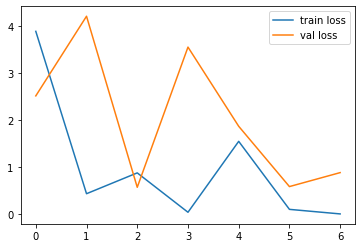

<Figure size 432x288 with 0 Axes>

In [137]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


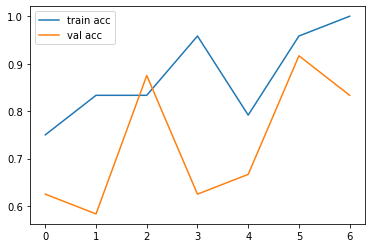

<Figure size 432x288 with 0 Axes>

In [138]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
